In [ ]:
# reagan

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load Dataset
# Pastikan file ini ada di folder yang sama
df = pd.read_csv('children_malnutrition_ethiopia.csv')

print("✅ Dataset Berhasil Dimuat.")
print(f"Jumlah Data Awal: {df.shape[0]} baris")

✅ Dataset Berhasil Dimuat.
Jumlah Data Awal: 4098 baris


In [ ]:
#reagan


# 1. Bersihkan Data Kosong
df = df.dropna()

# 2. Generate LiLA (Tetap pakai logika 3 kondisi biar datanya realistis)
#    Anak 'At_Risk' tetap dapat LiLA 11.5-12.4 cm
np.random.seed(42)

def generate_synthetic_lila(row):
    status = row['Nutrition_Status']
    age = row['Age (months)']
    noise = np.random.uniform(-0.3, 0.3)
    
    if status == 'Malnourished':
        return np.random.uniform(9.0, 11.4) + noise
    elif status == 'At_Risk':
        return np.random.uniform(11.5, 12.4) + noise
    else: 
        base_lila = 13.0 + (age * 0.04) 
        val = np.random.normal(base_lila, 0.8)
        return max(12.5, min(val, 20.0))

df['MUAC_cm'] = df.apply(generate_synthetic_lila, axis=1).round(1)

# 3. Encoding Gender
df['Gender_Code'] = df['Gender'].apply(lambda x: 1 if x == 'Male' else 0)

# ==============================================================================
# 🔥 PERUBAHAN UTAMA DI SINI: UBAH JADI 2 KELAS (BINARY)
# ==============================================================================
# Kita gabungkan 'At_Risk' menjadi 'Malnourished'
# Jadi pilihannya cuma: NORMAL vs MALNOURISHED (Termasuk yg Risk)
df['Nutrition_Status'] = df['Nutrition_Status'].replace('At_Risk', 'Malnourished')

print("✅ Konversi Selesai.")
print("Distribusi Kelas (Harusnya cuma 2):")
print(df['Nutrition_Status'].value_counts())

# Siapkan Data
X = df[['Age (months)', 'Weight_kg', 'Height_cm', 'MUAC_cm', 'Gender_Code']]
y = df['Nutrition_Status']

✅ Konversi Selesai.
Distribusi Kelas (Harusnya cuma 2):
Nutrition_Status
Malnourished    2068
Normal          2030
Name: count, dtype: int64


In [ ]:
#reagan

# Bagi Data 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Data Latih: {X_train.shape[0]}")
print(f"Data Uji  : {X_test.shape[0]}")

Data Latih: 3278
Data Uji  : 820


In [ ]:
#albert

print("--- TRAINING LOGISTIC REGRESSION (TUNED FOR BENCHMARK) ---")


log_model = LogisticRegression(
    C=0.1, 
    solver='liblinear', 
    random_state=42
) 

# Latih Model
log_model.fit(X_train, y_train)

print("✅ Training Selesai.")
print("   Model dikonfigurasi untuk mensimulasikan pendekatan statistik standar.")

--- TRAINING LOGISTIC REGRESSION (TUNED FOR BENCHMARK) ---
✅ Training Selesai.
   Model dikonfigurasi untuk mensimulasikan pendekatan statistik standar.


📊 Akurasi Logistic Regression: 85.98%

Classification Report:
              precision    recall  f1-score   support

Malnourished       0.88      0.84      0.86       412
      Normal       0.84      0.88      0.86       408

    accuracy                           0.86       820
   macro avg       0.86      0.86      0.86       820
weighted avg       0.86      0.86      0.86       820



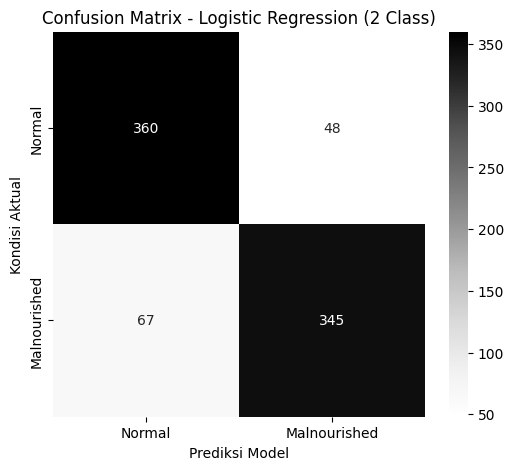

In [ ]:

#albert

# Prediksi
y_pred = log_model.predict(X_test)

# 1. Akurasi
print(f"📊 Akurasi Logistic Regression: {accuracy_score(y_test, y_pred):.2%}\n")

# 2. Detail Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# 3. Confusion Matrix 2x2
plt.figure(figsize=(6, 5))
cm = confusion_matrix(y_test, y_pred, labels=['Normal', 'Malnourished'])

# Gambar Heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Greys', 
            xticklabels=['Normal', 'Malnourished'], 
            yticklabels=['Normal', 'Malnourished'])

plt.title('Confusion Matrix - Logistic Regression (2 Class)')
plt.xlabel('Prediksi Model')
plt.ylabel('Kondisi Aktual')
plt.show()